Importing the dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving labeled_dataset.xlsx to labeled_dataset.xlsx


Viewing dataset

In [23]:
import pandas as pd

# Load the dataset
dataset = pd.read_excel('labeled_dataset.xlsx')

# Display the first few rows of the dataset to understand its structure
print(dataset.head())

   Unnamed: 0                                           sentence  \
0           0  YouTube is making clear there will be no “birt...   
1           1  The increasingly bitter dispute between Americ...   
2           2  So while there may be a humanitarian crisis dr...   
3           3  A professor who teaches climate change classes...   
4           4  Looking around the United States, there is nev...   

                                           news_link      outlet  \
0  https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1  https://www.nbcnews.com/news/sports/women-s-te...       msnbc   
2  https://www.alternet.org/2019/01/here-are-5-of...    alternet   
3  https://www.breitbart.com/politics/2019/05/09/...   breitbart   
4  https://thefederalist.com/2020/03/11/woman-who...  federalist   

            topic    type  group_id  num_sent  Label_bias  \
0  elections-2020  center         1         1      Biased   
1           sport    left         1         1  Non-biased   

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [25]:
pip install newspaper3k

In [26]:
from newspaper import Article

In [27]:
dataset.columns

Index(['Unnamed: 0', 'sentence', 'news_link', 'outlet', 'topic', 'type',
       'group_id', 'num_sent', 'Label_bias', 'Label_opinion', 'article',
       'biased_words4'],
      dtype='object')

In [28]:
dataset.head(5)

,Unnamed: 0,sentence,news_link,outlet,topic,type,group_id,num_sent,Label_bias,Label_opinion,article,biased_words4
0,0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,1,1,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,"['belated', 'birtherism']"
1,1,The increasingly bitter dispute between Americ...,https://www.nbcnews.com/news/sports/women-s-te...,msnbc,sport,left,1,1,Non-biased,Entirely factual,"FRISCO, Texas — The increasingly bitter disput...",['bitter']
2,2,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,1,1,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,['crisis']
3,3,A professor who teaches climate change classes...,https://www.breitbart.com/politics/2019/05/09/...,breitbart,environment,right,1,1,Non-biased,No agreement,A professor who teaches climate change classes...,['legitimate']
4,4,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,1,1,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,"['killing', 'never', 'developing', 'humans', '..."


In [29]:
dataset.isna().any()

Unnamed: 0       False
sentence         False
news_link         True
outlet           False
topic            False
type             False
group_id         False
num_sent         False
Label_bias       False
Label_opinion    False
article           True
biased_words4    False
dtype: bool

In [32]:
dataset.shape

(1700, 12)

In [33]:
dataset.dropna(inplace=True)
dataset.shape

(1581, 12)

In [34]:
from newspaper import Article, ArticleException

def extract_text(url):
  count = 0
  try:
    article = Article(url)
    article.download()
    article.parse()
    return article.text
  except ArticleException as e:
    count = count+1
    print(f"Failed to extract text from URL {url}: {e}")
    return None

dataset['Text'] = dataset['news_link'].apply(extract_text)

Failed to extract text from URL https://www.reuters.com/article/us-doping-wada-russia/doping-wada-bitterly-disappointed-at-russias-failure-to-meet-deadline-idUSKCN1OV1Q5: Article `download()` failed with 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/article/us-doping-wada-russia/doping-wada-bitterly-disappointed-at-russias-failure-to-meet-deadline-idUSKCN1OV1Q5 on URL https://www.reuters.com/article/us-doping-wada-russia/doping-wada-bitterly-disappointed-at-russias-failure-to-meet-deadline-idUSKCN1OV1Q5
Failed to extract text from URL https://www.reuters.com/article/us-volkswagen-emissions-baden-wuerttembe/german-state-of-baden-wuerttemberg-sues-vw-for-damages-faz-idUSKCN1OZ0C8: Article `download()` failed with 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/article/us-volkswagen-emissions-baden-wuerttembe/german-state-of-baden-wuerttemberg-sues-vw-for-damages-faz-idUSKCN1OZ0C8 on URL https://www.reuters.com/article/us-volkswagen-emissions-baden-wu

In [35]:
dataset.isna().any()


Unnamed: 0       False
sentence         False
news_link        False
outlet           False
topic            False
type             False
group_id         False
num_sent         False
Label_bias       False
Label_opinion    False
article          False
biased_words4    False
Text              True
dtype: bool

In [36]:
droped_dataset = dataset.dropna()


In [37]:
droped_dataset.shape


(1373, 13)

In [38]:
droped_dataset.drop(columns = ['Unnamed: 0'], inplace=True)

<ipython-input-38-73eda757c956>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_dataset.drop(columns = ['Unnamed: 0'], inplace=True)


In [39]:
droped_dataset.isna().any()
droped_dataset.columns

Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
       'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
       'Text'],
      dtype='object')

In [40]:

# Map topics to numerical labels
labels, unique_topics = pd.factorize(dataset['topic'])

# Add the numerical labels to the DataFrame
dataset['topic_label'] = labels



# Display the first few rows to verify the new column
dataset[['sentence', 'news_link', 'outlet', 'topic', 'type', 'topic_label']].head()


,sentence,news_link,outlet,topic,type,topic_label
0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,0
1,The increasingly bitter dispute between Americ...,https://www.nbcnews.com/news/sports/women-s-te...,msnbc,sport,left,1
2,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,2
3,A professor who teaches climate change classes...,https://www.breitbart.com/politics/2019/05/09/...,breitbart,environment,right,3
4,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,4


Printing the label and the respective topic

In [41]:
# Print the mapping from topics to numerical labels
for i, topic in enumerate(unique_topics):
    print(f"Topic: {topic}, Numerical Label: {i}")

Topic: elections-2020, Numerical Label: 0
Topic: sport, Numerical Label: 1
Topic: immigration, Numerical Label: 2
Topic: environment, Numerical Label: 3
Topic: abortion, Numerical Label: 4
Topic: student-debt, Numerical Label: 5
Topic: vaccines, Numerical Label: 6
Topic: white-nationalism, Numerical Label: 7
Topic: coronavirus, Numerical Label: 8
Topic: trump-presidency, Numerical Label: 9
Topic: middle-class, Numerical Label: 10
Topic: gender, Numerical Label: 11
Topic: international-politics-and-world-news, Numerical Label: 12
Topic: gun-control, Numerical Label: 13


Text preprocessing ('Text' column) and applying BERT:
(takes 40 min to run)



In [42]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def generate_bert_embeddings(text):
    # Check if the text is None or empty, and return a zero vector if so
    if text is None or text.strip() == "":
        return np.zeros((1, model.config.hidden_size))

    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    # Generate embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract the embeddings for the [CLS] token
    embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return embeddings

# Assuming 'dataset' is your DataFrame and it has a column 'Text' with text data
# Generate BERT embeddings for the 'Text' column
dataset['BERT_Embeddings'] = dataset['Text'].apply(lambda x: generate_bert_embeddings(x)[0])

# Now, 'dataset['BERT_Embeddings']' contains the embeddings for your text data





In [59]:
dataset.shape

(1581, 14)

In [60]:
dataset[dataset['Text'] == '']

,sentence,news_link,outlet,topic,type,group_id,num_sent,Label_bias,Label_opinion,article,biased_words4,Text,topic_label,BERT_Embeddings
672,Abortion rights advocates worry this could mak...,https://www.msn.com/en-us/news/politics/voters...,msnbc,abortion,left,34,1,Non-biased,Entirely factual,© Pete Marovich—Getty Images Abortion rights a...,[],,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
809,The votes come as a new conservative majority ...,https://www.msn.com/en-us/news/politics/voters...,msnbc,abortion,left,41,1,Non-biased,No agreement,© Pete Marovich—Getty Images Abortion rights a...,['nervous'],,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Downloading the dataset with BERT embeddings so don't have to run again

In [57]:
dataset.to_csv("Bert_embeddings_fullText.csv", index = False)

In [58]:
dataset.columns

Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
       'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
       'Text', 'topic_label', 'BERT_Embeddings'],
      dtype='object')

**K-MEANS**

Creating the clusters (KMeans), using Silhouette score to create optimal number of clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

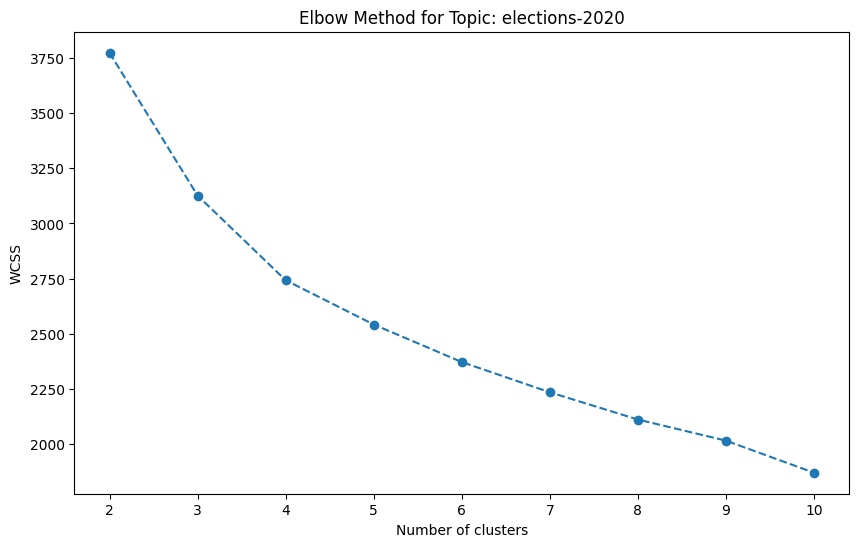

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: elections-2020, Optimum Clusters: 2, Silhouette Score: 0.5258650015632856


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

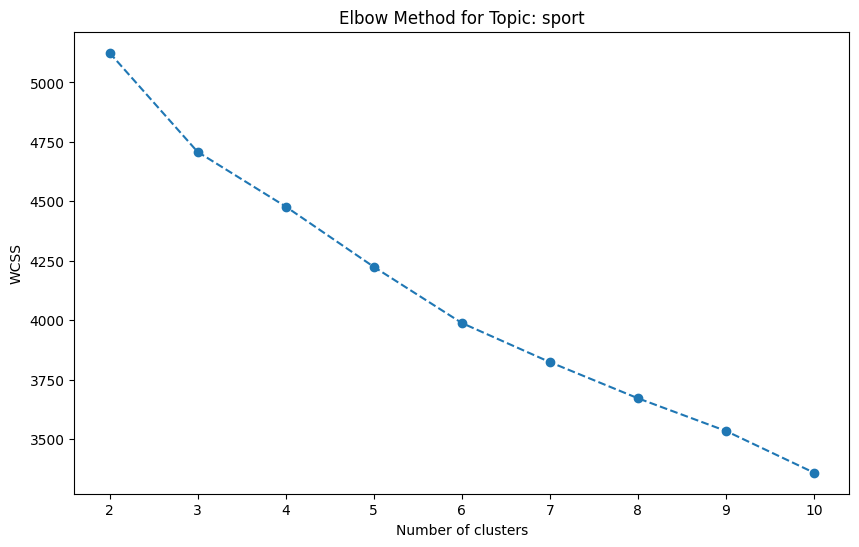

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: sport, Optimum Clusters: 2, Silhouette Score: 0.41919545468372593


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

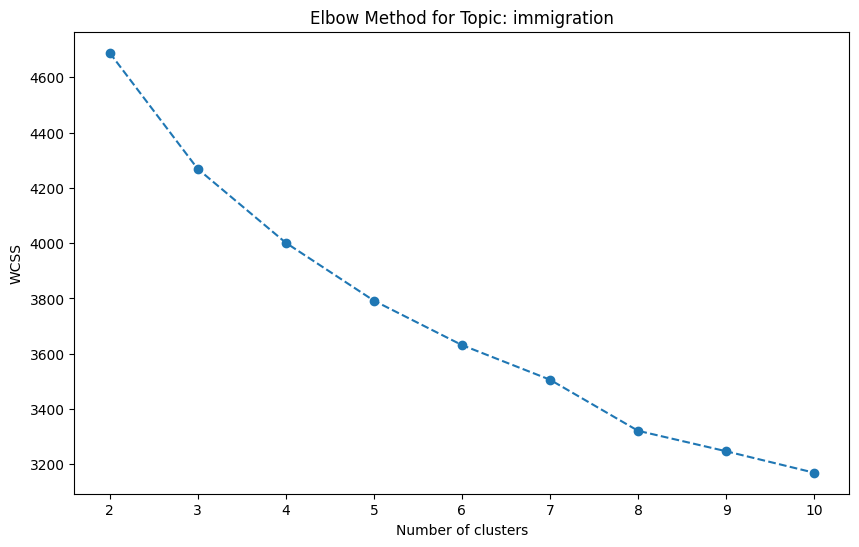

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: immigration, Optimum Clusters: 2, Silhouette Score: 0.4278644800282201


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

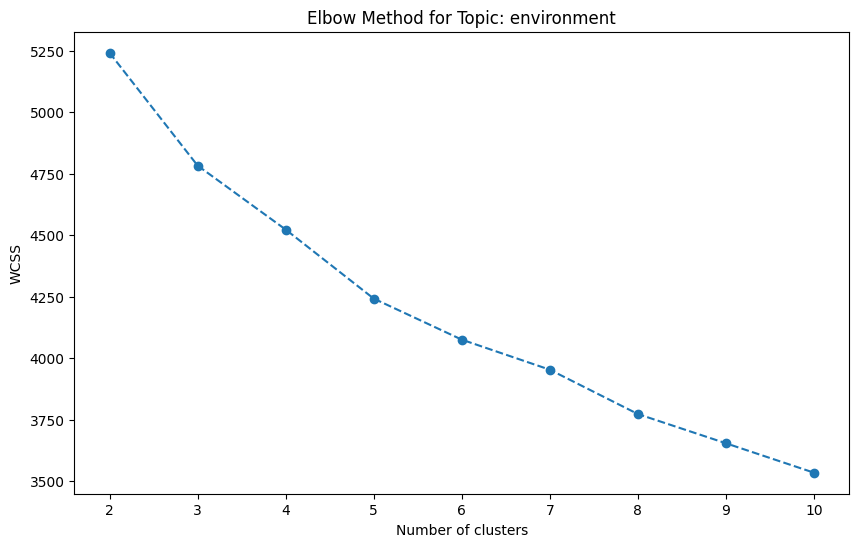

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: environment, Optimum Clusters: 2, Silhouette Score: 0.4375471812043429


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

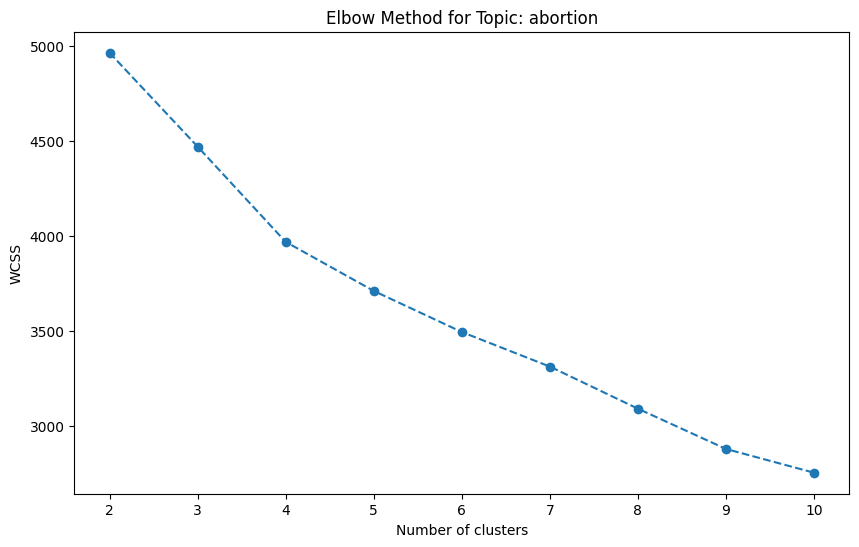

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: abortion, Optimum Clusters: 2, Silhouette Score: 0.4236079569136326


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

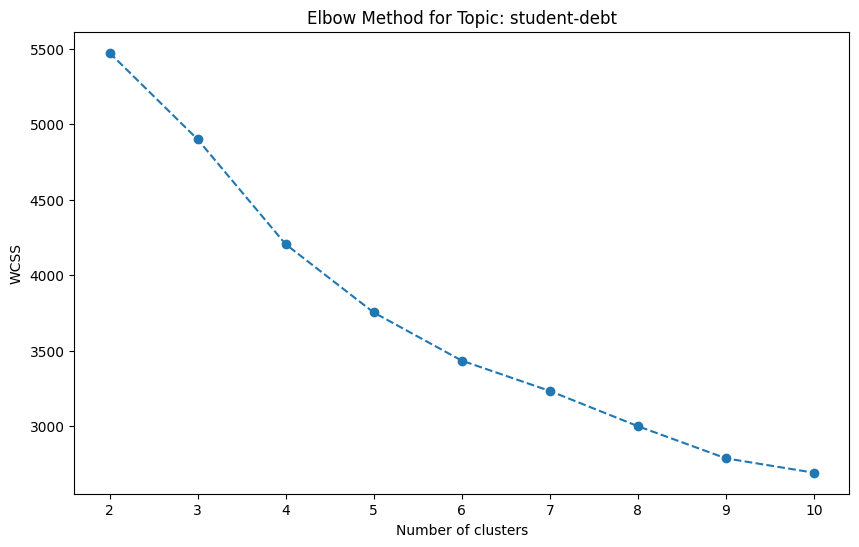

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: student-debt, Optimum Clusters: 2, Silhouette Score: 0.3951391122942942


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

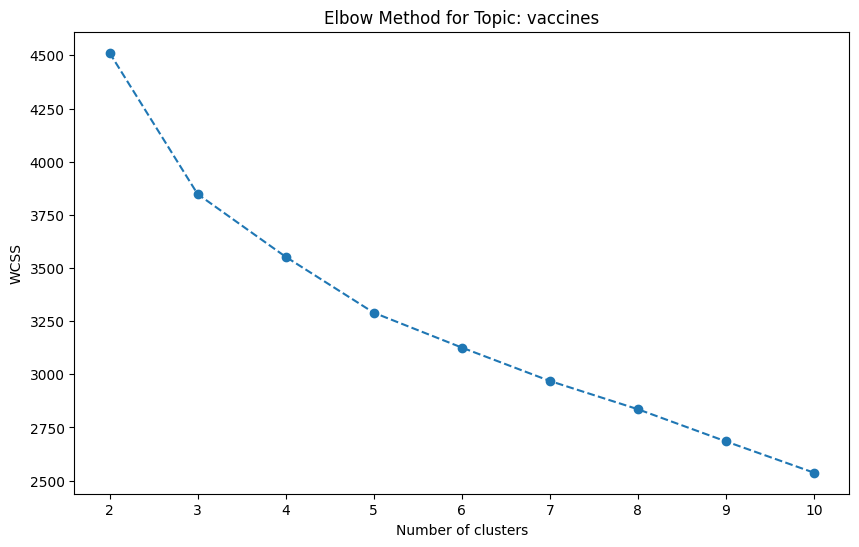

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: vaccines, Optimum Clusters: 2, Silhouette Score: 0.46481007750634595


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

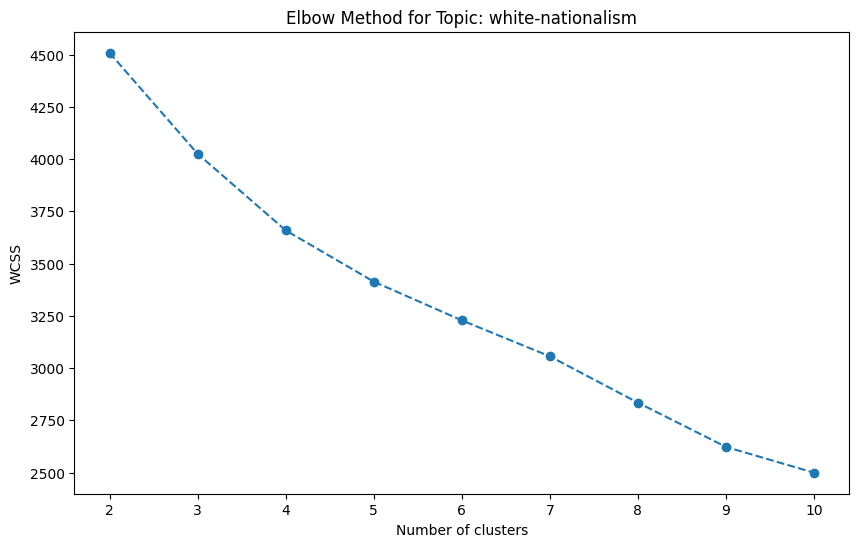

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: white-nationalism, Optimum Clusters: 2, Silhouette Score: 0.44615401088158246


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

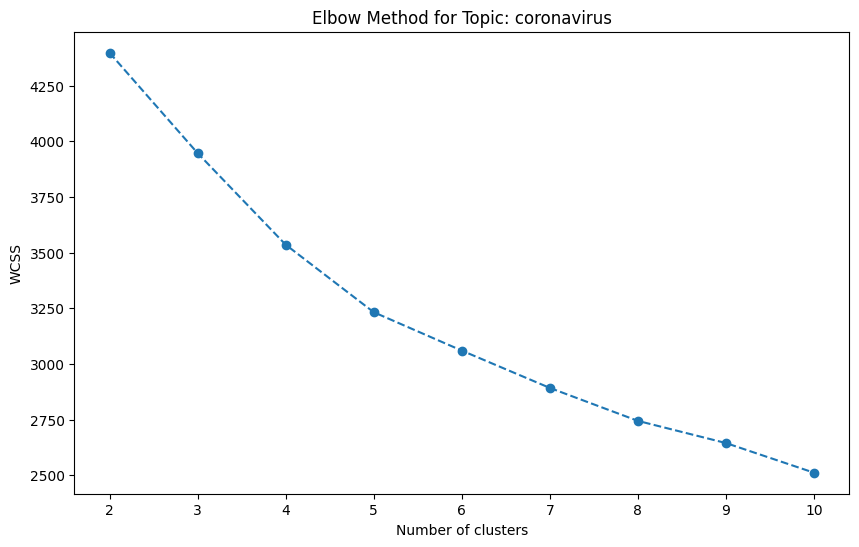

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: coronavirus, Optimum Clusters: 2, Silhouette Score: 0.48078280386445776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

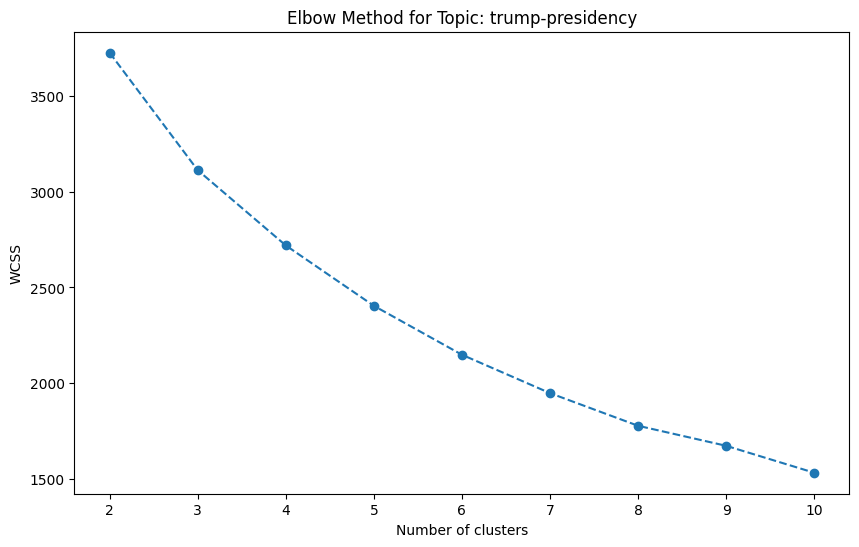

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: trump-presidency, Optimum Clusters: 10, Silhouette Score: 0.5293512502778687


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

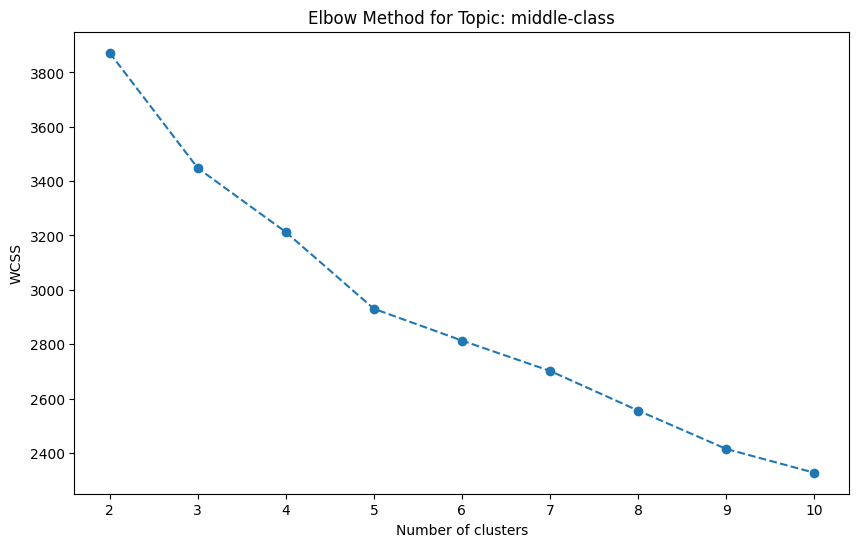

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: middle-class, Optimum Clusters: 2, Silhouette Score: 0.48077737797883585


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


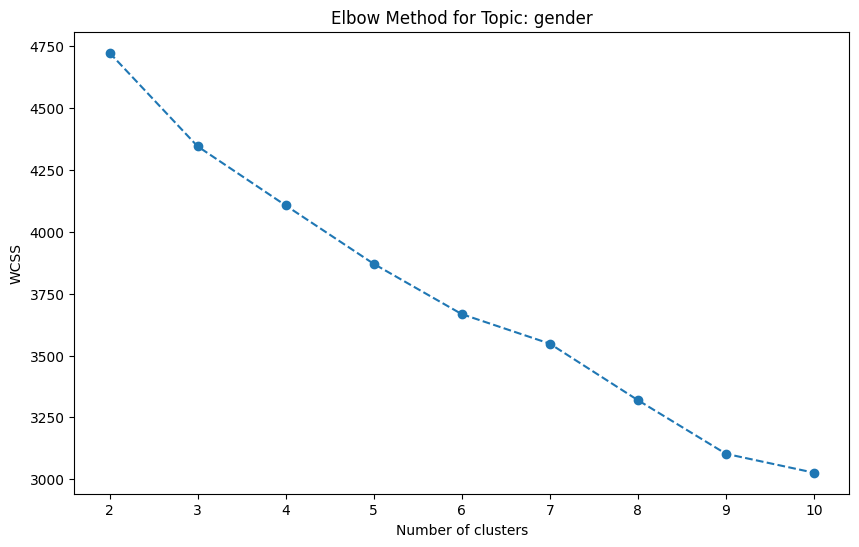

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: gender, Optimum Clusters: 2, Silhouette Score: 0.46889491265537353


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


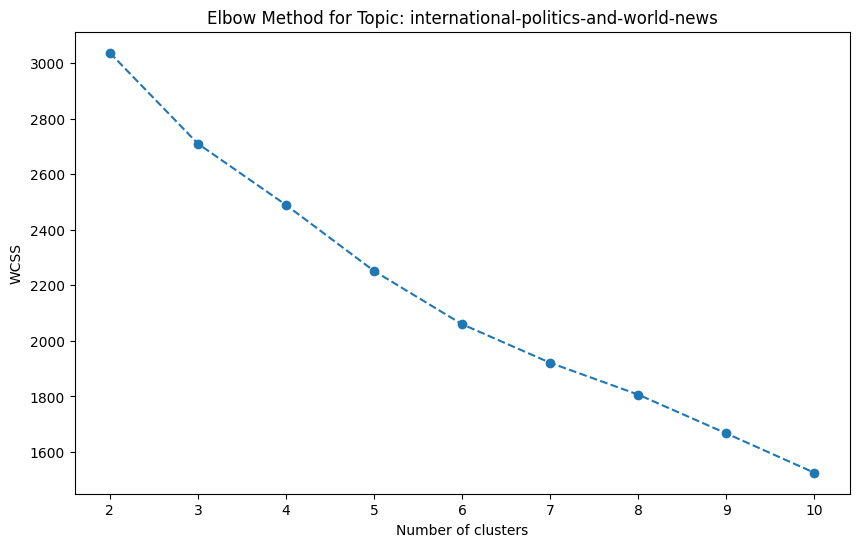

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: international-politics-and-world-news, Optimum Clusters: 2, Silhouette Score: 0.4668363415382857


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


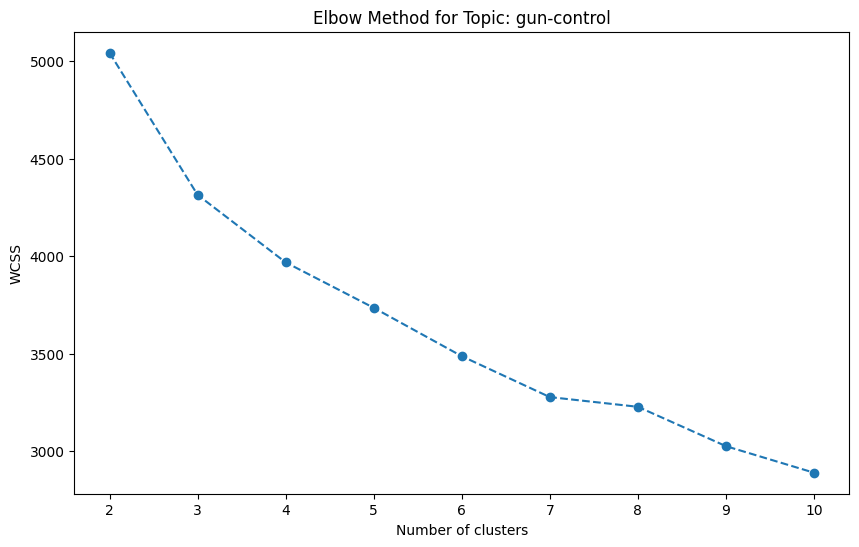

Topic: gun-control, Optimum Clusters: 2, Silhouette Score: 0.4444805796821271


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Bert_embeddings' are in the correct format

# Placeholder for the optimum number of clusters and silhouette scores
dataset['Optimum_Clusters'] = None
dataset['Silhouette_Score'] = None

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract Bert embeddings for the current topic
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'BERT_Embeddings'].tolist()
    embeddings_array = np.array(topic_embeddings)

    # Variables to store the best scores and cluster numbers
    best_n_clusters = 0
    best_silhouette = -1

    # Elbow method: calculate WCSS for a range of cluster numbers
    wcss = []
    for n_clusters in range(2, 11):  # Example range from 2 to 10
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings_array)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(embeddings_array, kmeans.labels_)

        # Check if this is the best silhouette score so far
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    # Plot WCSS for the current topic
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
    plt.title(f'Elbow Method for Topic: {topic}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Perform clustering with the best number of clusters and update the DataFrame
    final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=0).fit(embeddings_array)
    dataset.loc[dataset['topic'] == topic, 'Cluster'] = final_kmeans.labels_
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters'] = best_n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score'] = best_silhouette

    print(f"Topic: {topic}, Optimum Clusters: {best_n_clusters}, Silhouette Score: {best_silhouette}")


In [62]:
dataset.head(5)

,sentence,news_link,outlet,topic,type,group_id,num_sent,Label_bias,Label_opinion,article,biased_words4,Text,topic_label,BERT_Embeddings,Optimum_Clusters,Silhouette_Score,Cluster
0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,1,1,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,"['belated', 'birtherism']",Matt O'Brien\n\nAssociated Press\n\nYouTube is...,0,"[-0.24668999, -0.4568797, -0.1127078, 0.607756...",2,0.525865,0.0
1,The increasingly bitter dispute between Americ...,https://www.nbcnews.com/news/sports/women-s-te...,msnbc,sport,left,1,1,Non-biased,Entirely factual,"FRISCO, Texas — The increasingly bitter disput...",['bitter'],"FRISCO, Texas — The increasingly bitter disput...",1,"[-0.6433966, -0.6116364, -0.17980883, -0.18020...",2,0.419195,1.0
2,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,1,1,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,['crisis'],Speaking to the country for the first time fro...,2,"[-0.5607009, -0.49282894, -0.30629915, 0.11772...",2,0.427864,0.0
3,A professor who teaches climate change classes...,https://www.breitbart.com/politics/2019/05/09/...,breitbart,environment,right,1,1,Non-biased,No agreement,A professor who teaches climate change classes...,['legitimate'],A professor who teaches climate change classes...,3,"[-0.51877964, -0.14996594, -0.13845304, 0.0960...",2,0.437547,0.0
4,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,1,1,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,"['killing', 'never', 'developing', 'humans', '...",The left has a thing for taking babies hostage...,4,"[-0.27786937, -0.45335135, -0.48332155, -0.176...",2,0.423608,0.0


In [63]:
dataset[["outlet","topic","Cluster","Optimum_Clusters","Silhouette_Score"]]

,outlet,topic,Cluster,Optimum_Clusters,Silhouette_Score
0,usa-today,elections-2020,0.0,2,0.525865
1,msnbc,sport,1.0,2,0.419195
2,alternet,immigration,0.0,2,0.427864
3,breitbart,environment,0.0,2,0.437547
4,federalist,abortion,0.0,2,0.423608
...,...,...,...,...,...
1694,breitbart,coronavirus,0.0,2,0.480783
1695,alternet,gender,1.0,2,0.468895
1696,breitbart,gender,1.0,2,0.468895
1698,fox-news,middle-class,1.0,2,0.480777


In [65]:
dataset.columns, dataset.shape

(Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
        'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
        'Text', 'topic_label', 'BERT_Embeddings', 'Optimum_Clusters',
        'Silhouette_Score', 'Cluster'],
       dtype='object'),
 (1581, 17))

In [66]:
dataset.dtypes

sentence             object
news_link            object
outlet               object
topic                object
type                 object
group_id              int64
num_sent              int64
Label_bias           object
Label_opinion        object
article              object
biased_words4        object
Text                 object
topic_label           int64
BERT_Embeddings      object
Optimum_Clusters     object
Silhouette_Score     object
Cluster             float64
dtype: object

In [67]:
unique_topics_dataset = dataset.drop_duplicates(subset=['topic', 'Optimum_Clusters'])

# Now group by 'Optimum_Clusters' to count unique topics in each cluster count
grouped_by_optimal_clusters = unique_topics_dataset.groupby('Optimum_Clusters')['topic'].nunique()

# Display the results
print("Unique topics per Optimum_Clusters:\n", grouped_by_optimal_clusters)

Unique topics per Optimum_Clusters:
 Optimum_Clusters
2     13
10     1
Name: topic, dtype: int64


In [68]:
dataset['Silhouette_Score'].unique(), dataset['Optimum_Clusters'].unique()

(array([0.5258650015632856, 0.41919545468372593, 0.4278644800282201,
        0.4375471812043429, 0.4236079569136326, 0.3951391122942942,
        0.46481007750634595, 0.44615401088158246, 0.48078280386445776,
        0.5293512502778687, 0.48077737797883585, 0.46889491265537353,
        0.4668363415382857, 0.4444805796821271], dtype=object),
 array([2, 10], dtype=object))

**Hierarchical Clustering**

In [70]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import ast

# Placeholder for the optimum number of clusters and silhouette scores
dataset['Optimum_Clusters_HC'] = None
dataset['Silhouette_Score_HC'] = None

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract BERT embeddings for the current topic
    # Directly convert to list of arrays without using ast.literal_eval
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'BERT_Embeddings'].tolist()
    embeddings_array = np.array(topic_embeddings)

    # Variables to store the best scores and cluster numbers
    best_n_clusters = 0
    best_silhouette = -1

    # Calculate silhouette scores for a range of cluster numbers
    for n_clusters in range(2, 11):  # Example range from 2 to 10
        hc = AgglomerativeClustering(n_clusters=n_clusters)
        hc_labels = hc.fit_predict(embeddings_array)

        silhouette_avg = silhouette_score(embeddings_array, hc_labels)

        # Check if this is the best silhouette score so far
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    # Perform clustering with the best number of clusters and update the DataFrame
    final_hc = AgglomerativeClustering(n_clusters=best_n_clusters)
    hc_labels_final = final_hc.fit_predict(embeddings_array)
    dataset.loc[dataset['topic'] == topic, 'Cluster_HC'] = hc_labels_final
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters_HC'] = best_n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score_HC'] = best_silhouette

    print(f"Hierarchical Clustering - Topic: {topic}, Optimum Clusters: {best_n_clusters}, Silhouette Score: {best_silhouette}")

Hierarchical Clustering - Topic: elections-2020, Optimum Clusters: 2, Silhouette Score: 0.5258650015632856
Hierarchical Clustering - Topic: sport, Optimum Clusters: 2, Silhouette Score: 0.41919545468372593
Hierarchical Clustering - Topic: immigration, Optimum Clusters: 2, Silhouette Score: 0.4278644800282201
Hierarchical Clustering - Topic: environment, Optimum Clusters: 2, Silhouette Score: 0.4375471812043429
Hierarchical Clustering - Topic: abortion, Optimum Clusters: 2, Silhouette Score: 0.4236079569136326
Hierarchical Clustering - Topic: student-debt, Optimum Clusters: 2, Silhouette Score: 0.3951391122942942
Hierarchical Clustering - Topic: vaccines, Optimum Clusters: 2, Silhouette Score: 0.46481007750634595
Hierarchical Clustering - Topic: white-nationalism, Optimum Clusters: 2, Silhouette Score: 0.44615401088158246
Hierarchical Clustering - Topic: coronavirus, Optimum Clusters: 2, Silhouette Score: 0.48078280386445776
Hierarchical Clustering - Topic: trump-presidency, Optimum Clu

In [71]:
dataset[["outlet","topic","Cluster_HC","Optimum_Clusters_HC","Silhouette_Score_HC"]]

,outlet,topic,Cluster_HC,Optimum_Clusters_HC,Silhouette_Score_HC
0,usa-today,elections-2020,0.0,2,0.525865
1,msnbc,sport,0.0,2,0.419195
2,alternet,immigration,0.0,2,0.427864
3,breitbart,environment,0.0,2,0.437547
4,federalist,abortion,0.0,2,0.423608
...,...,...,...,...,...
1694,breitbart,coronavirus,0.0,2,0.480783
1695,alternet,gender,0.0,2,0.468895
1696,breitbart,gender,0.0,2,0.468895
1698,fox-news,middle-class,0.0,2,0.480777


In [72]:
unique_topics_dataset = dataset.drop_duplicates(subset=['topic', 'Optimum_Clusters_HC'])

# Now group by 'Optimum_Clusters' to count unique topics in each cluster count
grouped_by_optimal_clusters = unique_topics_dataset.groupby('Optimum_Clusters_HC')['topic'].nunique()

# Display the results
print("Unique topics per Optimum_Clusters:\n", grouped_by_optimal_clusters)

Unique topics per Optimum_Clusters:
 Optimum_Clusters_HC
2     13
10     1
Name: topic, dtype: int64


In [73]:
dataset['Silhouette_Score_HC'].unique(), dataset['Optimum_Clusters_HC'].unique()

(array([0.5258650015632856, 0.41919545468372593, 0.4278644800282201,
        0.4375471812043429, 0.4236079569136326, 0.3951391122942942,
        0.46481007750634595, 0.44615401088158246, 0.48078280386445776,
        0.5451481453467978, 0.48077737797883585, 0.46889491265537353,
        0.4668363415382857, 0.4444805796821271], dtype=object),
 array([2, 10], dtype=object))

**EXpectation Maximization**

In [74]:
from sklearn.mixture import GaussianMixture

# Placeholder for the optimum number of clusters and silhouette scores
dataset['Optimum_Clusters_EM'] = None
dataset['Silhouette_Score_EM'] = None

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract BERT embeddings for the current topic
    # Directly convert to list of arrays without using ast.literal_eval
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'BERT_Embeddings'].tolist()
    embeddings_array = np.array(topic_embeddings)

    # Variables to store the best scores and cluster numbers
    best_n_clusters = 0
    best_silhouette = -1

    # Calculate silhouette scores for a range of cluster numbers
    for n_clusters in range(2, 11):  # Example range from 2 to 10
        em = GaussianMixture(n_components=n_clusters, random_state=0)
        em.fit(embeddings_array)
        em_labels = em.predict(embeddings_array)

        silhouette_avg = silhouette_score(embeddings_array, em_labels)

        # Check if this is the best silhouette score so far
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    # Perform clustering with the best number of clusters and update the DataFrame
    final_em = GaussianMixture(n_components=best_n_clusters, random_state=0)
    em_labels_final = final_em.fit_predict(embeddings_array)
    dataset.loc[dataset['topic'] == topic, 'Cluster_EM'] = em_labels_final
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters_EM'] = best_n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score_EM'] = best_silhouette

    print(f"EM Clustering - Topic: {topic}, Optimum Clusters: {best_n_clusters}, Silhouette Score: {best_silhouette}")

EM Clustering - Topic: elections-2020, Optimum Clusters: 2, Silhouette Score: 0.5258650015632856
EM Clustering - Topic: sport, Optimum Clusters: 2, Silhouette Score: 0.41919545468372593
EM Clustering - Topic: immigration, Optimum Clusters: 2, Silhouette Score: 0.4278644800282201
EM Clustering - Topic: environment, Optimum Clusters: 2, Silhouette Score: 0.4375471812043429
EM Clustering - Topic: abortion, Optimum Clusters: 2, Silhouette Score: 0.4236079569136326
EM Clustering - Topic: student-debt, Optimum Clusters: 2, Silhouette Score: 0.3951391122942942
EM Clustering - Topic: vaccines, Optimum Clusters: 2, Silhouette Score: 0.46481007750634595
EM Clustering - Topic: white-nationalism, Optimum Clusters: 10, Silhouette Score: 0.27163852086983986
EM Clustering - Topic: coronavirus, Optimum Clusters: 2, Silhouette Score: 0.48078280386445776
EM Clustering - Topic: trump-presidency, Optimum Clusters: 2, Silhouette Score: 0.5257067692895024
EM Clustering - Topic: middle-class, Optimum Cluster

In [75]:
unique_topics_dataset = dataset.drop_duplicates(subset=['topic', 'Optimum_Clusters_EM'])

# Now group by 'Optimum_Clusters' to count unique topics in each cluster count
grouped_by_optimal_clusters = unique_topics_dataset.groupby('Optimum_Clusters_EM')['topic'].nunique()

# Display the results
print("Unique topics per Optimum_Clusters:\n", grouped_by_optimal_clusters)

Unique topics per Optimum_Clusters:
 Optimum_Clusters_EM
2     12
9      1
10     1
Name: topic, dtype: int64


In [76]:
dataset['Silhouette_Score_EM'].unique(), dataset['Optimum_Clusters_EM'].unique()

(array([0.5258650015632856, 0.41919545468372593, 0.4278644800282201,
        0.4375471812043429, 0.4236079569136326, 0.3951391122942942,
        0.46481007750634595, 0.27163852086983986, 0.48078280386445776,
        0.5257067692895024, 0.48077737797883585, 0.46889491265537353,
        0.4045290151432118, 0.4444805796821271], dtype=object),
 array([2, 10, 9], dtype=object))